In [82]:
from qutip import *
from numpy import *
import matplotlib.pyplot as plt
import matplotlib as mpl

In [6]:
q = Qobj([[1], [0]])

q

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [7]:
sy = Qobj([[0,-1j], [1j,0]])  # the sigma-y Pauli operator

sy

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [8]:
sz = Qobj([[1,0], [0,-1]]) # the sigma-z Pauli operator

sz

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

In [9]:
H = 1.0 * sz + 0.1 * sy

print("Qubit Hamiltonian = \n")
H

Qubit Hamiltonian = 



Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.+0.j   0.-0.1j]
 [ 0.+0.1j -1.+0.j ]]

In [15]:
print(sy.dag())
print(H.eigenenergies())

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]
[-1.00498756  1.00498756]


In [30]:
destroy(8) *coherent_dm(N=8, alpha=1.0)*destroy(8).dag()-coherent_dm(N=8, alpha=1.0)

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 3.04302848e-08 -2.06721178e-07  2.14475701e-06 -1.55391555e-05
   9.05322951e-05 -4.32871841e-04  1.72451920e-03 -5.77267786e-03]
 [-2.06721178e-07 -4.43872507e-07  1.97706442e-06 -1.56359635e-05
   9.04838368e-05 -4.32893253e-04  1.72450943e-03 -5.77267810e-03]
 [ 2.14475701e-06  1.97706442e-06  3.01793988e-06 -1.01211103e-05
   6.44498492e-05 -3.05894901e-04  1.21950669e-03 -4.08189737e-03]
 [-1.55391555e-05 -1.56359635e-05 -1.01211103e-05 -1.26921787e-05
   3.37819619e-05 -1.78123474e-04  7.03391750e-04 -2.35670388e-03]
 [ 9.05322951e-05  9.04838368e-05  6.44498492e-05  3.37819619e-05
   3.69771201e-05 -8.01846103e-05  3.55740589e-04 -1.17822997e-03]
 [-4.32871841e-04 -4.32893253e-04 -3.05894901e-04 -1.78123474e-04
  -8.01846103e-05 -7.86098258e-05  1.39629598e-04 -5.27555757e-04]
 [ 1.72451920e-03  1.72450943e-03  1.21950669e-03  7.03391750e-04
   3.55740589e-04  1.39629598e-04  1.35107908e

In [32]:
N=2
psi1 = tensor(basis(N,1), basis(N,0)) # excited first qubit
psi2 = tensor(basis(N,0), basis(N,1)) # excited second qubit
sz1 = tensor(sigmaz(), qeye(2))

In [38]:
psi1

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]

In [41]:
print(basis(N,1))
print(basis(N,0))
print(tensor(basis(N,1), basis(N,1)))

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]]


In [14]:
wc = 1.0 # cavity frequency
wa = 1.0 # qubit/atom frenqency
g = 0.1  # coupling strength

# cavity mode operator
a = tensor(destroy(5), qeye(2))

# qubit/atom operators
sz = tensor(qeye(5), sigmaz())   # sigma-z operator
sm = tensor(qeye(5), destroy(2)) # sigma-minus operator

# the Jaynes-Cumming Hamiltonian
H = wc * a.dag() * a - 0.5 * wa * sz + g * (a * sm.dag() + a.dag() * sm)

H

Quantum object: dims = [[5, 2], [5, 2]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[-0.5         0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.5         0.1         0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.1         0.5         0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          1.5         0.14142136  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.14142136  1.5         0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          2.5
   0.17320508  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.17320508
   2.5         0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.   

# Unitary evolution for the state...

In [52]:
# Hamiltonian
H = sigmax()

# initial state
psi0 = basis(2, 1)

# list of times for which the solver should store the state vector
tlist = np.linspace(0, 10, 100)

result = mesolve(H, psi0, tlist, [], [])

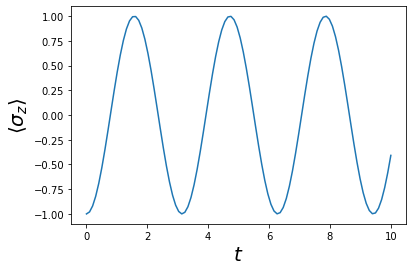

In [53]:
fig, axes = plt.subplots(1,1)

axes.plot(tlist, expect(sigmaz(), result.states))

axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r'$\left<\sigma_z\right>$', fontsize=20);

### ...and for the expectation values 

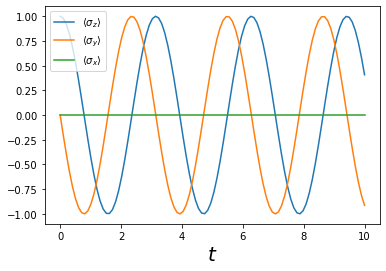

In [45]:
resultEXP = mesolve(H, psi0, tlist, [], [sigmax(), sigmay(), sigmaz()])


fig, axes = plt.subplots(1,1)

axes.plot(tlist, resultEXP.expect[2], label=r'$\left<\sigma_z\right>$')
axes.plot(tlist, resultEXP.expect[1], label=r'$\left<\sigma_y\right>$')
axes.plot(tlist, resultEXP.expect[0], label=r'$\left<\sigma_x\right>$')

axes.set_xlabel(r'$t$', fontsize=20)
axes.legend(loc=2);



# Dissipative dynamics

### With a fock state $|5\rangle$

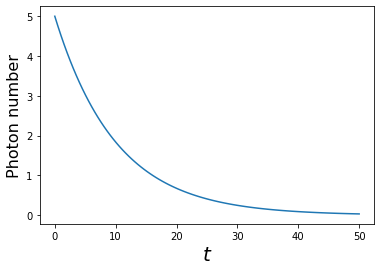

In [57]:
w = 1.0               # oscillator frequency
kappa = 0.1           # relaxation rate
a = destroy(10)       # oscillator annihilation operator
rho0 = fock_dm(10, 5) # initial state, fock state with 5 photons
H = w * a.dag() * a   # Hamiltonian

# A list of collapse operators
c_ops = [np.sqrt(kappa) * a]



tlist = np.linspace(0, 50, 100)

# request that the solver return the expectation value of the photon number state operator a.dag() * a
result = mesolve(H, rho0, tlist, c_ops, [a.dag() * a]) 



fig, axes = plt.subplots(1,1)
axes.plot(tlist, result.expect[0])
axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r"Photon number", fontsize=16);



### With a coherent state $|\alpha =\sqrt{5}\rangle$

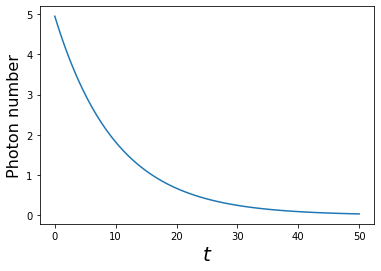

In [88]:
w = 1.0               # oscillator frequency
kappa = 0.1           # relaxation rate
a = destroy(10)       # oscillator annihilation operator
rho0 = coherent_dm(10, alpha=np.sqrt(5)) # initial state, coherent state with 5 photons
H = w * a.dag() * a   # Hamiltonian

# A list of collapse operators
c_ops = [np.sqrt(kappa) * a]



tlist = np.linspace(0, 50, 100)

# request that the solver return the expectation value of the photon number state operator a.dag() * a
result = mesolve(H, rho0, tlist, c_ops, [a.dag() * a]) 



fig, axes = plt.subplots(1,1)
axes.plot(tlist, result.expect[0])
axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r"Photon number", fontsize=16);


## Test

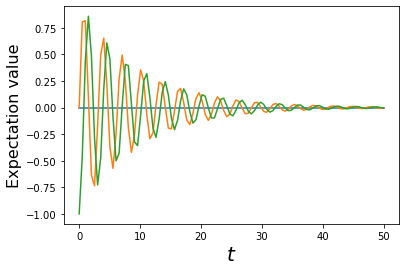

In [105]:
w = 1.0               # oscillator frequency
kappa = 0.1           # relaxation rate
rho0 = basis(2, 1) # initial state, coherent state with 5 photons
H = w * sigmax()  # Hamiltonian

# A list of collapse operators
c_ops = [np.sqrt(kappa) * sigmay() ]



tlist = np.linspace(0, 50, 100)

# request that the solver return the expectation value of the photon number state operator a.dag() * a
result = mesolve(H, rho0, tlist, c_ops, [sigmax(), sigmay(), sigmaz()]) 



fig, axes = plt.subplots(1,1)
axes.plot(tlist, result.expect[0])
axes.plot(tlist, result.expect[1])
axes.plot(tlist, result.expect[2])

axes.set_xlabel(r'$t$', fontsize=20)
axes.set_ylabel(r"Expectation value", fontsize=16);


#  Vacuum Rabi oscillations in the Jaynes-Cummings model

In [86]:
pi=np.pi
wc = 1.0  * 2 * pi  # cavity frequency
wa = 1.0  * 2 * pi  # atom frequency
g  = 0.05 * 2 * pi  # coupling strength
kappa = 0.005       # cavity dissipation rate
gamma = 0.05        # atom dissipation rate
N = 15              # number of cavity fock states
n_th_a = 0.0        # avg number of thermal bath excitation
use_rwa = True

tlist = np.linspace(0,25,101)

In [87]:
# intial state
psi0 = tensor(basis(N,0), basis(2,1))    # start with an excited atom

# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
else:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())

In [88]:
c_ops = []

# cavity relaxation
rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a)

# cavity excitation, if temperature > 0
rate = kappa * n_th_a
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a.dag())

# qubit relaxation
rate = gamma
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * sm)

In [92]:
output = mesolve(H, psi0, tlist, c_ops, [a.dag() * a, sm.dag() * sm])

Text(0.5, 1.0, 'Vacuum Rabi oscillations')

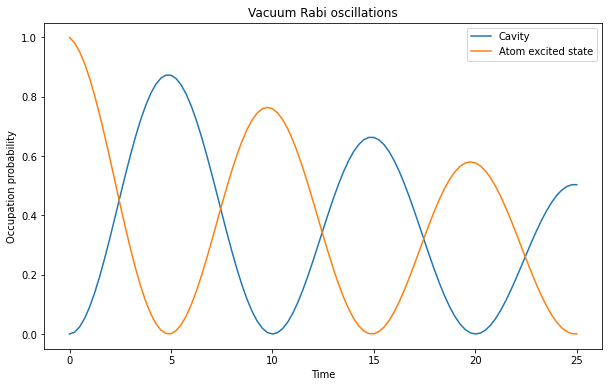

In [93]:
n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(10,6))

axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')
axes.set_title('Vacuum Rabi oscillations')

Text(0.5, 1.0, 'Vacuum Rabi oscillations (Without RWA)')

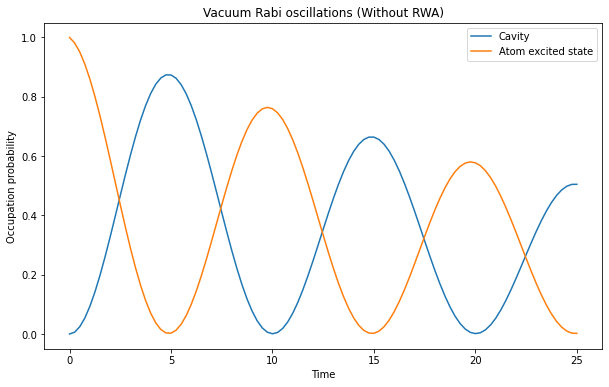

In [18]:
n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(10,6))

axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')
axes.set_title('Vacuum Rabi oscillations (Without RWA)')

Text(0.5, 1.0, 'Vacuum Rabi oscillations (without dissipation)')

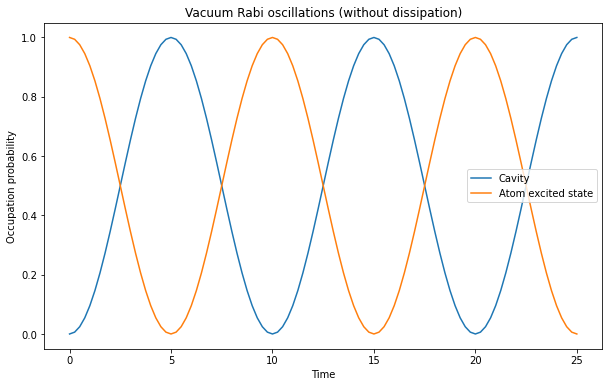

In [38]:
n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(10,6))

axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')
axes.set_title('Vacuum Rabi oscillations (without dissipation)')

### Wigner function

In [94]:
output = mesolve(H, psi0, tlist, c_ops, [])

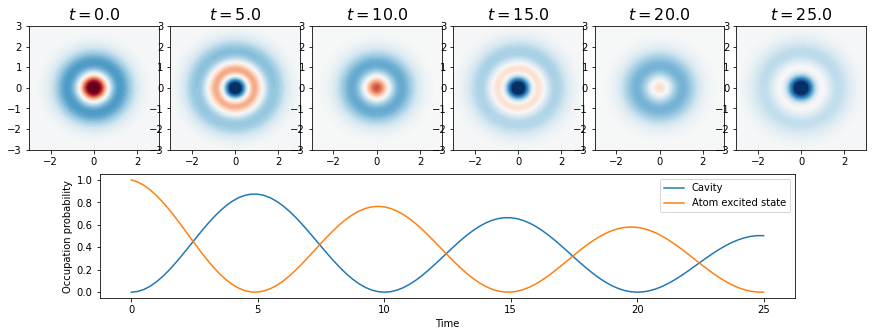

In [97]:
t_idx = where([tlist == t for t in [0.0, 5.0, 10, 15, 20, 25]])[1]
rho_list = array(output.states)[t_idx]

fig_grid = (2, len(rho_list)*2)
fig = plt.figure(figsize=(2.5*len(rho_list),5))

for idx, rho in enumerate(rho_list):
    rho=Qobj(rho)
    rho_cavity = ptrace(rho, 0)
    W = wigner(rho_cavity, xvec, xvec)
    ax = plt.subplot2grid(fig_grid, (0, 2*idx), colspan=2)
    ax.contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.25,.25), cmap=plt.get_cmap('RdBu'))
    ax.set_title(r"$t = %.1f$" % tlist[t_idx][idx], fontsize=16)

# plot the cavity occupation probability in the ground state
ax = plt.subplot2grid(fig_grid, (1, 1), colspan=(fig_grid[1]-2))
ax.plot(tlist, n_c, label="Cavity")
ax.plot(tlist, n_a, label="Atom excited state")
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability');


In [101]:
ptrace(output.states[0],0)

Quantum object: dims = [[15], [15]], shape = (15, 15), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]